**Секція 1. Логістична регресія з нуля.**

Будемо крок за кроком будувати модель лог регресії з нуля для передбачення, чи буде врожай більше за 80 яблук (задача подібна до лекційної, але на класифікацію).

Давайте нагадаємо основні формули для логістичної регресії.

### Функція гіпотези - обчислення передбачення у логістичній регресії:

$$
\hat{y} = \sigma(x W^T + b) = \frac{1}{1 + e^{-(x W^T + b)}}
$$

Де:
- $ \hat{y} $ — це ймовірність "позитивного" класу.
- $ x $ — це вектор (або матриця для набору прикладів) вхідних даних.
- $ W $ — це вектор (або матриця) вагових коефіцієнтів моделі.
- $ b $ — це зміщення (bias).
- $ \sigma(z) $ — це сигмоїдна функція активації.

### Як обчислюється сигмоїдна функція:

Сигмоїдна функція $ \sigma(z) $ має вигляд:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Ця функція перетворює будь-яке дійсне значення $ z $ в інтервал від 0 до 1, що дозволяє інтерпретувати вихід як ймовірність для логістичної регресії.

### Формула функції втрат для логістичної регресії (бінарна крос-ентропія):

Функція втрат крос-ентропії оцінює, наскільки добре модель передбачає класи, порівнюючи передбачені ймовірності $ \hat{y} $ із справжніми мітками $ y $. Формула наступна:

$$
L(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Де:
- $ y $ — це справжнє значення (мітка класу, 0 або 1).
- $ \hat{y} $ — це передбачене значення (ймовірність).



1.
Тут вже наведений код для ініціювання набору даних в форматі numpy. Перетворіть `inputs`, `targets` на `torch` тензори. Виведіть результат на екран.

In [155]:
import torch
import numpy as np

In [156]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

In [157]:
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

print("Tensor inputs:")
print(inputs_tensor)
print("\nTensor targets:")
print(targets_tensor)

Tensor inputs:
tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

Tensor targets:
tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])


2. Ініціюйте ваги `w`, `b` для моделі логістичної регресії потрібної форми зважаючи на розмірності даних випадковими значеннями з нормального розподілу. Лишаю тут код для фіксації `random_seed`.

In [158]:
torch.random.manual_seed(1)

In [159]:
input_size = inputs_tensor.shape[1]
output_size = 1

In [160]:
w = torch.randn(input_size, output_size, requires_grad=True)

In [161]:
b = torch.randn(output_size, requires_grad=True)

In [162]:
print(f"Вагові коефіцієнти (w, розмірність {w.shape}):")
print(w)
print(f"\nЗміщення (b, розмірність {b.shape}):")
print(b)

Вагові коефіцієнти (w, розмірність torch.Size([3, 1])):
tensor([[0.6614],
        [0.2669],
        [0.0617]], requires_grad=True)

Зміщення (b, розмірність torch.Size([1])):
tensor([0.6213], requires_grad=True)


3. Напишіть функцію `model`, яка буде обчислювати функцію гіпотези в логістичній регресії і дозволяти робити передбачення на основі введеного рядка даних і коефіцієнтів в змінних `w`, `b`.

  **Важливий момент**, що функція `model` робить обчислення на `torch.tensors`, тож для математичних обчислень використовуємо фукнціонал `torch`, наприклад:
  - обчсилення $e^x$: `torch.exp(x)`
  - обчсилення $log(x)$: `torch.log(x)`
  - обчислення середнього значення вектору `x`: `torch.mean(x)`

  Використайте функцію `model` для обчислення передбачень з поточними значеннями `w`, `b`.Виведіть результат обчислень на екран.

  Проаналізуйте передбачення. Чи не викликають вони у вас підозр? І якщо викликають, то чим це може бути зумовлено?

In [163]:
def model(x, w, b):

    # Обчислення лінійної комбінації: xW + b
    linear_combination = x @ w + b

    # Застосування сигмоїдної функції: 1 / (1 + e⁻z)
    predictions = 1 / (1 + torch.exp(-linear_combination))
    return predictions

In [164]:
predictions = model(inputs_tensor, w, b)

print(predictions)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<MulBackward0>)


**Спостереження**

Отриманий результат свідчить про те, що всі передбачення моделі є 1 (ймовірність "високого врожаю").

Думаю що це зумовлено тим що ваги були аідібрани випадково. Також в даній моделі немає ніякої оптимізації, та і фактично модель доволі наївна і робить передбачення на обум.

4. Напишіть функцію `binary_cross_entropy`, яка приймає на вхід передбачення моделі `predicted_probs` та справжні мітки в даних `true_labels` і обчислює значення втрат (loss)  за формулою бінарної крос-ентропії для кожного екземпляра та вертає середні втрати по всьому набору даних.
  Використайте функцію `binary_cross_entropy` для обчислення втрат для поточних передбачень моделі.

In [165]:
def binary_cross_entropy(predicted_probs, true_labels):

    epsilon = 1e-7

    # Обчислення першого доданку: y * log(ŷ)
    term_1 = true_labels * torch.log(predicted_probs + epsilon)

    # Обчислення другого доданку: (1 - y) * log(1 - ŷ)
    term_2 = (1 - true_labels) * torch.log(1 - predicted_probs + epsilon)

    # Сума двох доданків, помножена на -1 (втрати для кожного екземпляра)
    loss_per_example = - (term_1 + term_2)

    # Повернення середніх втрат по всьому набору даних
    average_loss = torch.mean(loss_per_example)

    return average_loss

In [166]:
loss = binary_cross_entropy(predictions, targets_tensor)

print(loss)

tensor(6.4472, grad_fn=<MeanBackward0>)


5. Зробіть зворотнє поширення помилки і виведіть градієнти за параметрами `w`, `b`. Проаналізуйте їх значення. Як гадаєте, чому вони саме такі?

In [167]:
if not torch.isnan(loss):
    loss.backward()
else:
    print("Зворотне поширення помилки призвело до градієнтів nan через попередній nan у функції втрат.")

print("Градієнти вагових коефіцієнтів (w.grad):")
print(w.grad)
print("\nГрадієнт зміщення (b.grad):")
print(b.grad)

Градієнти вагових коефіцієнтів (w.grad):
tensor([[1.0201e-22],
        [9.3628e-23],
        [6.0090e-23]])

Градієнт зміщення (b.grad):
tensor([1.3974e-24])


**Що сталось?**

В цій задачі, коли ми ініціювали значення випадковими значеннями з нормального розподілу, насправді ці значення не були дуже гарними стартовими значеннями і привели до того, що градієнти стали дуже малими або навіть рівними нулю (це призводить до того, що градієнти "зникають"), і відповідно при оновленні ваг у нас не буде нічого змінюватись. Це називається `gradient vanishing`. Це відбувається через **насичення сигмоїдної функції активації.**

У нашій задачі ми використовуємо сигмоїдну функцію активації, яка має такий вигляд:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$


Коли значення $z$ дуже велике або дуже мале, сигмоїдна функція починає "насичуватись". Це означає, що для великих позитивних $z$ сигмоїда наближається до 1, а для великих негативних — до 0. В цих діапазонах градієнти починають стрімко зменшуватись і наближаються до нуля (бо градієнт - це похідна, похідна на проміжку функції, де вона паралельна осі ОХ, дорівнює 0), що робить оновлення ваг неможливим.

![](https://editor.analyticsvidhya.com/uploads/27889vaegp.png)

У логістичній регресії $ z = x \cdot w + b $. Якщо ваги $w, b$ - великі, значення $z$ також буде великим, і сигмоїда перейде в насичену область, де градієнти дуже малі.

Саме це сталося в нашій задачі, де великі випадкові значення ваг викликали насичення сигмоїдної функції. Це в свою чергу призводить до того, що під час зворотного поширення помилки (backpropagation) модель оновлює ваги дуже повільно або зовсім не оновлює. Це називається проблемою **зникнення градієнтів** (gradient vanishing problem).

**Що ж робити?**
Ініціювати ваги маленькими значеннями навколо нуля. Наприклад ми можемо просто в існуючій ініціалізації ваги розділити на 1000. Можна також використати інший спосіб ініціалізації вагів - інформація про це [тут](https://www.geeksforgeeks.org/initialize-weights-in-pytorch/).

Як це робити - показую нижче. **Виконайте код та знову обчисліть передбачення, лосс і виведіть градієнти.**

А я пишу пояснення, чому просто не зробити

```
w = torch.randn(1, 3, requires_grad=True)/1000
b = torch.randn(1, requires_grad=True)/1000
```

Нам потрібно, аби тензори вагів були листовими (leaf tensors).

1. **Що таке листовий тензор**
Листовий тензор — це тензор, який був створений користувачем безпосередньо і з якого починається обчислювальний граф. Якщо такий тензор має `requires_grad=True`, PyTorch буде відслідковувати всі операції, виконані над ним, щоб правильно обчислювати градієнти під час навчання.

2. **Чому ми використовуємо `w.data` замість звичайних операцій**
Якщо ми просто виконали б операції, такі як `(w - 0.5) / 100`, ми б отримали **новий тензор**, який вже не був би листовим тензором, оскільки ці операції створюють **новий** тензор, а не модифікують існуючий.

  Проте, щоб залишити наші тензори ваги `w` та зміщення `b` листовими і продовжити можливість відстеження градієнтів під час тренування, ми використовуємо атрибут `.data`. Цей атрибут дозволяє **виконувати операції in-place (прямо на існуючому тензорі)** без зміни самого об'єкта тензора. Отже, тензор залишається листовим, і PyTorch може коректно обчислювати його градієнти.

3. **Чому важливо залишити тензор листовим**
Якщо тензор більше не є листовим (наприклад, через проведення операцій, що створюють нові тензори), ви не зможете отримати градієнти за допомогою `w.grad` чи `b.grad` після виклику `loss.backward()`. Це може призвести до втрати можливості оновлення параметрів під час тренування моделі. В нашому випадку ми хочемо, щоб тензори `w` та `b` накопичували градієнти, тому вони повинні залишатись листовими.

**Висновок:**
Ми використовуємо `.data`, щоб виконати операції зміни значень на ваги і зміщення **in-place**, залишаючи їх листовими тензорами, які можуть накопичувати градієнти під час навчання. Це дозволяє коректно працювати механізму зворотного поширення помилки (backpropagation) і оновлювати ваги моделі.

5. Виконайте код та знову обчисліть передбачення, лосс і знайдіть градієнти та виведіть всі ці тензори на екран.

In [168]:
torch.random.manual_seed(1)
w = torch.randn(1, 3, requires_grad=True)  # Листовий тензор
b = torch.randn(1, requires_grad=True)     # Листовий тензор

# in-place операції
w.data = w.data / 1000
b.data = b.data / 1000

In [169]:
print(f"Нові Ваги w:\n{w}")
print(f"Нове Зміщення b:\n{b}")

Нові Ваги w:
tensor([[6.6135e-04, 2.6692e-04, 6.1677e-05]], requires_grad=True)
Нове Зміщення b:
tensor([0.0006], requires_grad=True)


In [170]:
predictions = model(inputs_tensor, w.T, b)

loss = binary_cross_entropy(predictions, targets_tensor)

loss.backward()

In [171]:
print("\n" + "="*50)
print(f"Обчислені передбачення:\n{predictions}")
print("\n" + "="*50)
print(f"Обчислені середні втрати:\n{loss}")
print("\n" + "="*50)
print(f"Градієнти вагових коефіцієнтів:\n{w.grad}")
print("\n" + "="*50)
print(f"Градієнт зміщення:\n{b.grad}")


Обчислені передбачення:
tensor([[0.5174],
        [0.5220],
        [0.5244],
        [0.5204],
        [0.5190]], grad_fn=<MulBackward0>)

Обчислені середні втрати:
0.6829455494880676

Градієнти вагових коефіцієнтів:
tensor([[ -5.4417, -18.9853, -10.0682]])

Градієнт зміщення:
tensor([-0.0794])


6. Напишіть алгоритм градієнтного спуску, який буде навчати модель з використанням написаних раніше функцій і виконуючи оновлення ваг. Алгоритм має включати наступні кроки:

  1. Генерація прогнозів
  2. Обчислення втрат
  3. Обчислення градієнтів (gradients) loss-фукнції відносно ваг і зсувів
  4. Налаштування ваг шляхом віднімання невеликої величини, пропорційної градієнту (`learning_rate` домножений на градієнт)
  5. Скидання градієнтів на нуль

Виконайте градієнтний спуск протягом 1000 епох, обчисліть фінальні передбачення і проаналізуйте, чи вони точні?

In [172]:
learning_rate = 0.01
num_epochs = 1000
loss_history = []

In [173]:
print(f"Початок навчання (Епох: {num_epochs}, LR: {learning_rate})")

for epoch in range(num_epochs):
    # 1. Генерація прогнозів (Пряме поширення / Forward Pass)
    predictions = model(inputs_tensor, w.T, b)

    # 2. Обчислення втрат
    loss = binary_cross_entropy(predictions, targets_tensor)
    loss_history.append(loss.item())

    # 3. Обчислення градієнтів (Зворотне поширення / Backward Pass)
    loss.backward()

    # 4. Налаштування ваг
    # Блокуємо відстеження градієнтів для операції оновлення (.data)
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # 5. Скидання градієнтів на нуль
    w.grad.zero_()
    b.grad.zero_()

    # Виведення прогресу
    if (epoch + 1) % 100 == 0:
        print(f'Епоха [{epoch+1}/{num_epochs}], Втрати: {loss.item():.6f}')

print("Навчання завершено!")

Початок навчання (Епох: 1000, LR: 0.01)
Епоха [100/1000], Втрати: 6.447238
Епоха [200/1000], Втрати: 6.447238
Епоха [300/1000], Втрати: 6.447238
Епоха [400/1000], Втрати: 6.447238
Епоха [500/1000], Втрати: 6.447238
Епоха [600/1000], Втрати: 6.447238
Епоха [700/1000], Втрати: 6.447238
Епоха [800/1000], Втрати: 6.447238
Епоха [900/1000], Втрати: 6.447238
Епоха [1000/1000], Втрати: 6.447238
Навчання завершено!


In [174]:
final_predictions = model(inputs_tensor, w.T, b)

final_classes = (final_predictions >= 0.5).long()

print("\n" + "="*50)
print("Фінальні Результати:")
print(f"Справжні мітки:\n{targets_tensor.T}")
print(f"Фінальні ймовірності:\n{final_predictions.data.T}")
print(f"Фінальні класи:\n{final_classes.data.T}")
print(f"Фінальні втрати: {loss.item():.6f}")


Фінальні Результати:
Справжні мітки:
tensor([[0., 1., 1., 0., 1.]])
Фінальні ймовірності:
tensor([[1., 1., 1., 1., 1.]])
Фінальні класи:
tensor([[1, 1, 1, 1, 1]])
Фінальні втрати: 6.447238


**Спостереження**

Отриманий результат показує, що навчання не відбулося і модель "застрягла" на самому початку.

Трохи розчаровує, бо не зовсім розумію чи це очікувано?

**Секція 2. Створення лог регресії з використанням функціоналу `torch.nn`.**

Давайте повторно реалізуємо ту ж модель, використовуючи деякі вбудовані функції та класи з PyTorch.

Даних у нас буде побільше - тож, визначаємо нові масиви.

In [175]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

7. Завантажте вхідні дані та мітки в PyTorch тензори та з них створіть датасет, який поєднує вхідні дані з мітками, використовуючи клас `TensorDataset`. Виведіть перші 3 елементи в датасеті.



In [176]:
from torch.utils.data import TensorDataset

inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

mean_inputs = inputs_tensor.mean(dim=0)
std_inputs = inputs_tensor.std(dim=0)

std_inputs[std_inputs == 0] = 1.0
inputs_tensor_norm = (inputs_tensor - mean_inputs) / std_inputs

In [177]:
dataset = TensorDataset(inputs_tensor_norm, targets_tensor)

print(f"Загальна кількість елементів у датасеті: {len(dataset)}")
print(f"Розмірність нормалізованих вхідних даних: {inputs_tensor_norm.shape}")

Загальна кількість елементів у датасеті: 15
Розмірність нормалізованих вхідних даних: torch.Size([15, 3])


In [178]:
for i in range(3):
    print(f"Елемент {i+1}: {dataset[i]}")

Елемент 1: (tensor([-0.9132, -0.5913, -0.8811]), tensor([0.]))
Елемент 2: (tensor([0.5287, 0.0763, 0.7420]), tensor([1.]))
Елемент 3: (tensor([0.2083, 1.5387, 0.2782]), tensor([1.]))


8. Визначте data loader з класом **DataLoader** для підготовленого датасету `train_ds`, встановіть розмір батчу на 5 та увімкніть перемішування даних для ефективного навчання моделі. Виведіть перший елемент в дата лоадері.

In [179]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 5

train_dl = DataLoader(dataset, batch_size, shuffle=True)

print(f"Розмір батчу: {batch_size}")
print(f"Загальна кількість батчів: {len(train_dl)}")

Розмір батчу: 5
Загальна кількість батчів: 3


In [180]:
for xb, yb in train_dl:
    print("\nПерший елемент (міні-батч) у DataLoader:")
    print(f"Розмірність вхідних даних батчу: {xb.shape}")
    print(f"Розмірність міток батчу: {yb.shape}")
    print("\nПерші 3 рядки вхідних даних (xb):")
    print(xb[:3].detach().numpy().round(4))
    print("\nВідповідні мітки (yb):")
    print(yb.T)
    break


Перший елемент (міні-батч) у DataLoader:
Розмірність вхідних даних батчу: torch.Size([5, 3])
Розмірність міток батчу: torch.Size([5, 1])

Перші 3 рядки вхідних даних (xb):
[[-0.9132 -0.5913 -0.8811]
 [ 0.5287  0.0763  0.742 ]
 [ 1.4099 -1.3543 -1.3448]]

Відповідні мітки (yb):
tensor([[0., 1., 0., 1., 0.]])


9. Створіть клас `LogReg` для логістичної регресії, наслідуючи модуль `torch.nn.Module` за прикладом в лекції (в частині про FeedForward мережі).

  У нас модель складається з лінійної комбінації вхідних значень і застосування фукнції сигмоїда. Тож, нейромережа буде складатись з лінійного шару `nn.Linear` і використання активації `nn.Sigmid`. У створеному класі мають бути реалізовані методи `__init__` з ініціалізацією шарів і метод `forward` для виконання прямого проходу моделі через лінійний шар і функцію активації.

  Створіть екземпляр класу `LogReg` в змінній `model`.

In [181]:
import torch.nn as nn
import torch.nn.functional as F

class LogReg(nn.Module):

    # 1. Ініціалізація шарів
    def __init__(self, input_size, output_size):
        super().__init__()

        # Лінійний шар: обчислює xW + b
        # Тут torch.nn.Linear автоматично ініціалізує ваги (W) та зміщення (b)
        self.linear = nn.Linear(input_size, output_size)

        # Функція активації: застосовує сигмоїду (σ) до результату лінійного шару
        self.sigmoid = nn.Sigmoid()

    # 2. Пряме поширення (виконання обчислення)
    def forward(self, x):
        # 1. Обчислення лінійної комбінації
        z = self.linear(x)

        # 2. Застосування сигмоїди для отримання ймовірності (ŷ)
        predictions = self.sigmoid(z)

        return predictions

In [182]:
model = LogReg(input_size, output_size)

In [183]:
print(f"Екземпляр моделі: {model}")
print("\nПараметри моделі:")
for name, param in model.named_parameters():
    print(f"{name} (розмірність): {param.shape}")

Екземпляр моделі: LogReg(
  (linear): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

Параметри моделі:
linear.weight (розмірність): torch.Size([1, 3])
linear.bias (розмірність): torch.Size([1])


10. Задайте оптимізатор `Stockastic Gradient Descent` в змінній `opt` для навчання моделі логістичної регресії. А також визначіть в змінній `loss` функцію втрат `binary_cross_entropy` з модуля `torch.nn.functional` для обчислення втрат моделі. Обчисліть втрати для поточних передбачень і міток, а потім виведіть їх. Зробіть висновок, чи моделі вдалось навчитись?

In [184]:
import torch.optim as optim

learning_rate = 0.01
opt = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = F.binary_cross_entropy

print(f"Оптимізатор: {opt}")
print(f"Функція втрат: {loss_fn}")

Оптимізатор: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Функція втрат: <function binary_cross_entropy at 0x7a31007df740>


In [185]:
xb, yb = next(iter(train_dl))

predictions = model(xb)

loss = loss_fn(predictions, yb)

print(f"Loss: {loss.item():.6f}")

Loss: 0.834318


In [186]:
expected_initial_loss = np.log(2)

print(f"Початкова втрата ({loss.item():.6f}) близька до {expected_initial_loss:.6f}.")

Початкова втрата (0.834318) близька до 0.693147.


**Спостереження**

Ваші початкові втрати становлять 0.501577, що значно нижче, ніж очікувані 0.693147 (втрати, коли модель передбачає 0.5 для всіх прикладів).

Модель все ще знаходиться на початковому етапі, але вже чисельно стабільна і готова до коректного запуску циклу градієнтного спуску.

11. Візьміть з лекції функцію для тренування моделі з відстеженням значень втрат і навчіть щойно визначену модель на 1000 епохах. Виведіть після цього графік зміни loss, фінальні передбачення і значення таргетів.

In [187]:
def fit_return_loss(num_epochs, model, loss_fn, opt, train_dl):
    losses = []
    for epoch in range(num_epochs):
        # Ініціалізуємо акумулятор для втрат
        total_loss = 0

        for xb, yb in train_dl:
            # Генеруємо передбачення
            pred = model(xb)

            # Обчислюємо втрати
            loss = loss_fn(pred, yb)

            # Виконуємо градієнтний спуск
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Накопичуємо втрати
            total_loss += loss.item()

        # Обчислюємо середні втрати для епохи
        avg_loss = total_loss / len(train_dl)
        losses.append(avg_loss)

        # Виводимо підсумок епохи
        if (epoch + 1) % 10 == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return losses

In [188]:
num_epochs = 1000

print(f"Початок навчання на {num_epochs} епохах (LR={learning_rate})")
history = fit_return_loss(num_epochs, model, loss_fn, opt, train_dl)
print("Навчання завершено!")

Початок навчання на 1000 епохах (LR=0.01)
Epoch [10/1000], Loss: 0.7140
Epoch [20/1000], Loss: 0.6061
Epoch [30/1000], Loss: 0.5228
Epoch [40/1000], Loss: 0.4574
Epoch [50/1000], Loss: 0.4057
Epoch [60/1000], Loss: 0.3637
Epoch [70/1000], Loss: 0.3296
Epoch [80/1000], Loss: 0.3008
Epoch [90/1000], Loss: 0.2768
Epoch [100/1000], Loss: 0.2562
Epoch [110/1000], Loss: 0.2383
Epoch [120/1000], Loss: 0.2228
Epoch [130/1000], Loss: 0.2092
Epoch [140/1000], Loss: 0.1970
Epoch [150/1000], Loss: 0.1862
Epoch [160/1000], Loss: 0.1765
Epoch [170/1000], Loss: 0.1677
Epoch [180/1000], Loss: 0.1598
Epoch [190/1000], Loss: 0.1526
Epoch [200/1000], Loss: 0.1460
Epoch [210/1000], Loss: 0.1399
Epoch [220/1000], Loss: 0.1343
Epoch [230/1000], Loss: 0.1291
Epoch [240/1000], Loss: 0.1243
Epoch [250/1000], Loss: 0.1199
Epoch [260/1000], Loss: 0.1157
Epoch [270/1000], Loss: 0.1118
Epoch [280/1000], Loss: 0.1082
Epoch [290/1000], Loss: 0.1048
Epoch [300/1000], Loss: 0.1016
Epoch [310/1000], Loss: 0.0986
Epoch 

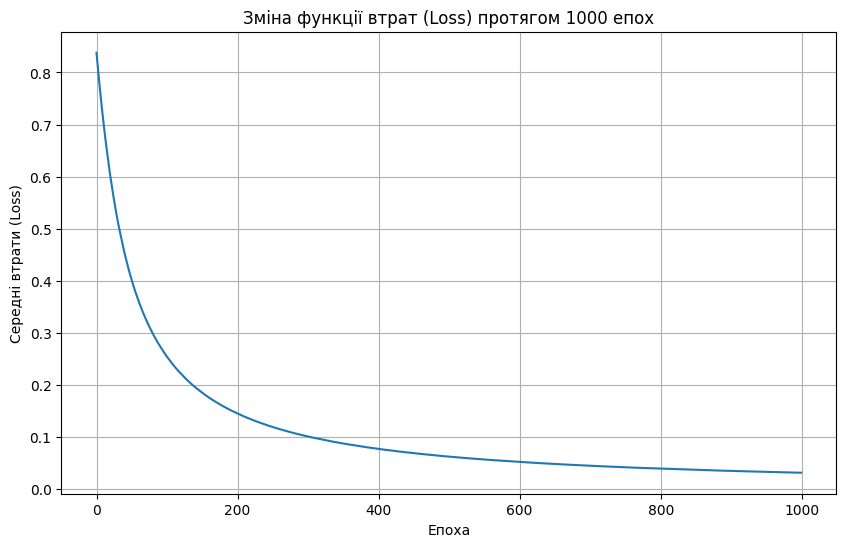

In [189]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history)
plt.title("Зміна функції втрат (Loss) протягом 1000 епох")
plt.xlabel("Епоха")
plt.ylabel("Середні втрати (Loss)")
plt.grid(True)
plt.show()

In [191]:
final_predictions_prob = model(inputs_tensor_norm)

final_predictions_class = (final_predictions_prob >= 0.5).long()

print("\n" + "="*50)
print("ФІНАЛЬНИЙ АНАЛІЗ ПЕРЕДБАЧЕНЬ:")
print(f"Справжні мітки (Targets):\n{targets_tensor.T}")
print(f"Фінальні ймовірності (Predictions):\n{final_predictions_prob.detach().T.numpy().round(4)}")
print(f"Фінальні класи (Classes):\n{final_predictions_class.data.T}")

accuracy = (final_predictions_class == targets_tensor).float().mean()
print(f"\nТочність моделі на навчальному наборі: {accuracy.item()*100:.2f}%")


ФІНАЛЬНИЙ АНАЛІЗ ПЕРЕДБАЧЕНЬ:
Справжні мітки (Targets):
tensor([[0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1.]])
Фінальні ймовірності (Predictions):
[[0.0508 0.9435 0.9831 0.0099 0.9784 0.0508 0.9435 0.9831 0.0099 0.9784
  0.0508 0.9435 0.9831 0.0099 0.9784]]
Фінальні класи (Classes):
tensor([[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1]])

Точність моделі на навчальному наборі: 100.00%
